# DAT210x - Programming with Python for DS

## Module6- Lab4

This code is intentionally missing! Read the directions on the course lab page!

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import time
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
path='Datasets/wheat.data'
X=pd.read_csv('Datasets/wheat.data', index_col = 0)
X.dropna(axis=0,inplace=True)

In [24]:
y=X.wheat_type
X.drop('wheat_type', axis = 1, inplace = True)
y=y.map({'canadian':0,'kama':1,'rosa':2})
iterations=5000
FAST_DRAW = True

In [25]:
def drawPlots(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    # You can use this to break any higher-dimensional space down,
    # And view cross sections of it.

    # If this line throws an error, use plt.style.use('ggplot') instead
    mpl.style.use('ggplot') # Look Pretty

    padding = 3
    resolution = 0.5
    max_2d_score = 0

    y_colors = ['#ff0000', '#00ff00', '#0000ff']
    my_cmap  = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
    colors   = [y_colors[i] for i in y_train]
    num_columns = len(X_train.columns)

    fig = plt.figure()
    fig.canvas.set_window_title(wintitle)
    fig.set_tight_layout(True)
    
    cnt = 0
    for col in range(num_columns):
        for row in range(num_columns):
            
            # Easy out
            if FAST_DRAW and col > row:
                cnt += 1
                continue

            ax = plt.subplot(num_columns, num_columns, cnt + 1)
            plt.xticks(())
            plt.yticks(())

            # Intersection:
            if col == row:
                plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
                cnt += 1
                continue


            # Only select two features to display, then train the model
            X_train_bag = X_train.ix[:, [row,col]]
            X_test_bag = X_test.ix[:, [row,col]]
            model.fit(X_train_bag, y_train)

            # Create a mesh to plot in
            x_min, x_max = X_train_bag.ix[:, 0].min() - padding, X_train_bag.ix[:, 0].max() + padding
            y_min, y_max = X_train_bag.ix[:, 1].min() - padding, X_train_bag.ix[:, 1].max() + padding
            xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                                 np.arange(y_min, y_max, resolution))

            # Plot Boundaries
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())

            # Prepare the contour
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
            plt.scatter(X_train_bag.ix[:, 0], X_train_bag.ix[:, 1], c=colors, alpha=0.5)


            score = round(model.score(X_test_bag, y_test) * 100, 3)
            plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
            max_2d_score = score if score > max_2d_score else max_2d_score

            cnt += 1

    print("Max 2D Score: ", max_2d_score)

In [26]:
def benchmark(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    print(wintitle + ' Results')
    s = time.time()
    
    for i in range(iterations):
        # TODO: train the classifier on the training data / labels:
        
        # .. your code here ..
        model=model.fit(X_train, y_train)
    print("{0} Iterations Training Time: ".format(iterations), time.time() - s)


    s = time.time()
    for i in range(iterations):
        # TODO: score the classifier on the testing data / labels:
    
        # .. your code here ..
        score=model.score(X_test, y_test)
    print("{0} Iterations Scoring Time: ".format(iterations), time.time() - s)
    print("High-Dimensionality Score: ", round((score*100), 3))
    return score

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=7)

DecisionTreeClassifier Results
5000 Iterations Training Time:  3.8846542835235596
5000 Iterations Scoring Time:  1.8635146617889404
High-Dimensionality Score:  91.803
Max 2D Score:  90.164


c:\users\zhang\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


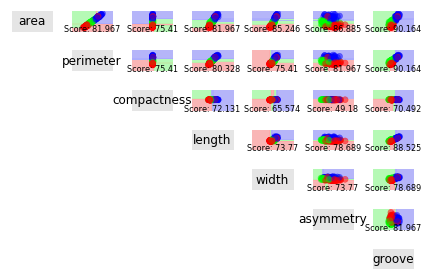

In [28]:
dtc = tree.DecisionTreeClassifier(max_depth=9, random_state=2)
benchmark(dtc, X_train, X_test, y_train, y_test, wintitle='DecisionTreeClassifier')
drawPlots(dtc, X_train, X_test, y_train, y_test, 'DecisionTreeClassifier')
plt.show()

SVC Results
5000 Iterations Training Time:  5.957056522369385
5000 Iterations Scoring Time:  2.1344776153564453
High-Dimensionality Score:  86.885
Max 2D Score:  93.443


c:\users\zhang\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


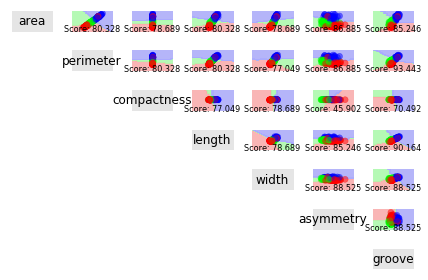

In [29]:
C = 1  
kernel = 'linear'  
svc=SVC(C=C,kernel='linear')
benchmark(svc, X_train, X_test, y_train, y_test, wintitle='SVC')
drawPlots(svc, X_train, X_test, y_train, y_test, 'SVC')
plt.show()

KNN Results
5000 Iterations Training Time:  2.9643661975860596
5000 Iterations Scoring Time:  6.982319593429565
High-Dimensionality Score:  83.607
Max 2D Score:  93.443


c:\users\zhang\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


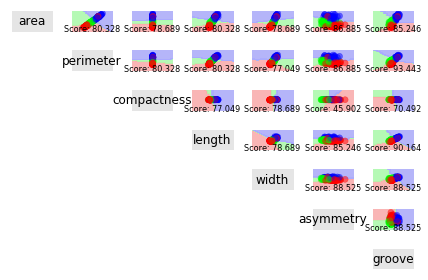

In [30]:
K=5
knn=knn=KNeighborsClassifier(n_neighbors=K)
benchmark(knn, X_train, X_test, y_train, y_test, wintitle='KNN')
drawPlots(svc, X_train, X_test, y_train, y_test, 'KNN')
plt.show()

In [36]:
def hdScore(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    print(wintitle + ' Results')
    #s = time.time()
    
    for i in range(iterations):
        # TODO: train the classifier on the training data / labels:
        
        # .. your code here ..
        model=model.fit(X_train, y_train)
    #print("{0} Iterations Training Time: ".format(iterations), time.time() - s)


    #s = time.time()
    for i in range(iterations):
        # TODO: score the classifier on the testing data / labels:
    
        # .. your code here ..
        score=model.score(X_test, y_test)
    #print("{0} Iterations Scoring Time: ".format(iterations), time.time() - s)
    print("High-Dimensionality Score: ", round((score*100), 3))
    return round((score*100), 3)

In [41]:
knn_hd_Score=83.607
max_d=0
for d in range(9,0,-1):
    dtc = tree.DecisionTreeClassifier(max_depth=d, random_state=2)
    hd_Score=hdScore(dtc, X_train, X_test, y_train, y_test, wintitle='dtc with max depth '+str(d))
    #print(hd_Score)
    if hd_Score<knn_hd_Score:
        max_d=d
        break
print('the depth we want is ',max_d)

dtc with max depth 9 Results
High-Dimensionality Score:  91.803
dtc with max depth 8 Results
High-Dimensionality Score:  91.803
dtc with max depth 7 Results
High-Dimensionality Score:  91.803
dtc with max depth 6 Results
High-Dimensionality Score:  91.803
dtc with max depth 5 Results
High-Dimensionality Score:  91.803
dtc with max depth 4 Results
High-Dimensionality Score:  88.525
dtc with max depth 3 Results
High-Dimensionality Score:  88.525
dtc with max depth 2 Results
High-Dimensionality Score:  85.246
dtc with max depth 1 Results
High-Dimensionality Score:  68.852
the depth we want is  1
